## Fill in group number and member names:

In [1]:
GROUP = "22"
NAME1 = "Ivar Fagerfjäll"
NAME2 = "Hanna Frederiksen"

# Optimization for learning - FRTN50

## Assignment 2

The purpose of this assignment is to empirically explore some convergence and implicit regularization properties of the stochastic gradient decent (SGD) method and some of its variants. These properties are mainly explored by considering simple polynomial fitting problems in $\mathbb{R}$ to facilitate easy comparison with known theoretical results and easy visualization. We will also compare the same fitting problem with multi-layer perceptrons also known as fully connected feedforward neural networks.

Below are the tasks that you need to solve. Keep this in mind:
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

---
### Exercise 1: Polynomial fitting in $\mathbb{R}$ using least squares with a polynomial feature map

Consider fitting the points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$ to a polynomial model $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ using the method of least squares. Here, the model is given by

$$
\begin{align}
    m(x;\theta) = \theta^{T}\phi(x)
\end{align}
$$

where $\theta\in\mathbb{R}^{n+1}$ is the parameter of the model and $\phi:\mathbb{R}\rightarrow\mathbb{R}^{n+1}$ is a polynomial feature map given by

$$
\begin{align}
    \phi(x) = 
    \begin{bmatrix}
    1 \\
    x \\
    \vdots \\
    x^{n}
    \end{bmatrix}
\end{align}
$$
for each $x\in\mathbb{R}$.

I.e. $m(\cdot;\theta)$ is a polynomial (in particular nonlinear) model of degree $n$ and is linear in the parameter $\theta$. If we compare to deep learning, the model $m(\cdot;\theta)$ would have a specific structure but would be nonlinear in the parameter $\theta$ in general.

The method of least squares involves solving the optimization problem

$$
\begin{equation}\label{eq:1}\tag{1}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \sum_{i=1}^{N}(m(x_{i};\theta) - y_{i})^{2} = \frac{1}{N} \sum_{i=1}^{N}\underbrace{(\theta^{T}\phi(x_{i}) - y_{i})^{2}}_{=f_{i}(\theta)} = \frac{1}{N} \sum_{i=1}^{N}f_{i}(\theta) 
\end{aligned}
\end{equation}
$$

giving an optimal point $\theta^{*}\in\mathbb{R}^{n+1}$, and letting $m(\cdot;\theta^{*})$ be the fitted model. If we let 

$$
\begin{align}
    X = 
    \begin{bmatrix}
    \phi(x_{1})^{T} \\
    \vdots \\
    \phi(x_{N})^{T} 
    \end{bmatrix}\in\mathbb{R}^{N \times (n+1)},  \quad \text{ and } \quad
    Y = 
    \begin{bmatrix}
    y_{1} \\
    \vdots \\
    y_{N}
    \end{bmatrix}\in\mathbb{R}^{N},
\end{align}
$$

optimization problem $\eqref{eq:1}$ can be written as 

$$
\begin{equation}\label{eq:2}\tag{2}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} = f(\theta).
\end{aligned}
\end{equation}
$$

Since the model $m(\cdot;\theta)$ is linear in $\theta$, the function $f$ is convex in $\theta$. This is not the case in deep learning, since the model $m(\cdot;\theta)$ would not be linear in $\theta$ in general.

If the points $x_{i}$ in $\{(x_{i},y_{i})\}_{i=1}^{N}$ are distinct, which is the case in our analysis, it holds that 

$$
\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}
$$
(See [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for more info.) In particular,
1. if $N < n+1$, optimization problem $\eqref{eq:2}$ is underdetermined, $X X^{T}$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$,
2. if $N > n+1$, optimization problem $\eqref{eq:2}$ is overdetermined and $X^{T} X$ is invertible,
3. if $N = n+1$, both $X X^{T}$ and $X^{T} X$ are invertible and optimization problem $\eqref{eq:2}$ is neither underdetermined nor overdetermined.

You are allowed to assume these facts as given.

---
__a)__ A model is sometimes said to be overparameterized if it has more parameters than data points. By the same token, a model is said to be underparameterized if it has less parameters than data points. 

- Suppose that our model is overparameterized. Which case of 1., 2. and 3. above does this corresponds to? 
- Suppose that our model is underparameterized. Which case of 1., 2. and 3. above does this corresponds to? 

Motivate your answer. It is crucial that you get this right to avoid confusion later.

__Solution:__ 

If a model is overparameterized it has more parameters than data points. And similar if a model is underparameterized it has fewer parameters then data points. 

Our model has $N$ data points and $n+1$ parameters. So for the model to be __overparameterized__

\begin{align}
    n+1 > N 
\end{align}

which corresponds to __case 1__, i.e. an undertermined optimization problem of form $(2)$. Similarly for the model to be __underparameterized__ 


\begin{align}
    n+1 < N
\end{align}

which corresponds to __case 2__, i.e. an overdetermined optimization problem of form $(2)$. 

---
__b)__ Find $\nabla f$, $\nabla f_{i}$ and $\nabla^{2}f$.

Carefully motivate your answer.

__Solution:__ 

Since $f_i$ is a composition of two twice differentiable functions it is also twice differentiable. We have that 

\begin{align}
    f_{i} (\theta) = (\theta^T \phi(x_i) - y_i)^2
\end{align}

and so $\nabla f_{i}$ is equal to 

\begin{align}
   \nabla f_{i} (\theta) = 2 \ \phi(x_i) (\theta^T \phi(x_i) -  y_i)
\end{align}

Since $f$ is a vector of twice differentiable functions $f_i$ it is also twice differentiable. For $f$ we have that 

\begin{align}
    f(\theta) = \frac{1}{N}  ||X \theta - Y||_2^2
\end{align}

Substituting $h(z) = \frac{1}{N} \left\lVert z \right\rVert_{2}^{2}$, $h : \mathbb{R^n} \to \mathbb{R}$ and $g(\theta) = X\theta - Y$, $g : \mathbb{R^n} \to \mathbb{R^n}$ gives:

\begin{align}
    f(\theta) = (h \circ g)(\theta)
\end{align}

Applying the chain rule gives:

\begin{align}
    & \nabla f(\theta) 
    = \nabla (h \circ g)(\theta)
    = \nabla(\frac{1}{N} || g(\theta) ||_{2}^{2}) \\
    & =\frac{2}{N} \nabla g(\theta) g(\theta)  
    = \frac{2}{N} X^T(X \theta - Y) \\ 
    & = \frac{2}{N} (X^T X \theta - X^T Y)
\end{align}

Lastely for $\nabla^{2}f$ we have 

\begin{align}
    \nabla^{2}f(\theta) = \frac{2}{N} X^T X 
\end{align}



---
__c)__ Since $f$ is convex and differentiable, all optimal points $\theta^{*}\in\mathbb{R}^{n+1}$ to the least squares problem are fully characterized by the condition that

$$
\begin{align}
    \nabla f (\theta^{*}) = 0.
\end{align}
$$

Suppose that the least squares problem is underparameterized. 

- Show that there exists a solution $\theta^{*}$
- Conclude that it is unique
- Find a expression for $f(\theta^{*})$

Carefully motivate your answer.

__Solution:__ 

We know from task $(a)$ that if the least square problem is underparameterized, the optimization problem is overdetermined and so $X^TX$ is invertible. From task $(b)$ we know that the gradient $\nabla f$ is 

\begin{align}
    \nabla f(\theta) = \frac{2}{N} (X^T X \theta - X^T Y). 
\end{align}

Putting this equal to zero we get

\begin{align}
    X^T X \theta = X^T Y
\end{align}

and since $X^TX$ is invertible this can be written as 

\begin{align} \label{eq:3}\tag{3}
    \theta^*= (X^T X)^{-1}X^T Y. 
\end{align}

So we can conclude that there exists a solution $\theta^{*}$. 
We have an overdetermined system, but since the rank of the matrix $X$ is given by

\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}

it's rank is $n+1$. And the solution to a linear system is unique if and only if the rank of its matrix representation equals the number of variables, which it does. 

Lastly to find an expression for $f(\theta^{*})$ we can put the derived expression $\ref{eq:3}$ in the function $f$ to arrive at

\begin{align}
    f(\theta^{*}) = \frac{1}{N}  ||X(X^T X)^{-1}X^T Y - Y||_2^2. 
\end{align}


---
__d)__ Suppose instead that the least squares problem is overparameterized. Let $\theta^{*}\in\mathbb{R}^{n+1}$. Show that $\theta^{*}$ is a solution to the least squares problem if and only if $X\theta^{*} = Y$. I.e. show that:
- If $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$.
- If $X\theta^{*} = Y$, then $\theta^{*}$ is a solution to the least squares problem.

Hence, the solution set is an affine set that can be written as $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$.
- Prove that the set $\Theta^{*}$ is affine.

Carefully motivate your answer.

_Hints:_ Note that $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$. Moreover, what can be said in the overparameterized case? What is the definition of an affine set?

__Solution:__ 

We know have a overparameterized least square problem, i.e. $N < n+1$ and the system is underdetermined. We further know that $XX^T$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$. 

We start with assuming that $\theta^*$ is the solution to the least square problem. Setting the gradient to zero we know from before that 

\begin{align}
    X^T X \theta = X^T Y.
\end{align}

Multiplying both sides with $X$ 

\begin{align}
    XX^T X \theta = XX^T Y \\ 
\end{align}

and knowing that $XX^T$ now is invertible we get

\begin{align}
    X\theta = (XX^T)^{-1}XX^T Y = Y.
\end{align}

So the first direction is proven. We now want to prove the other way, and start with assuming that $X\theta^{*} = Y$. Putting this in the equation for $f$ we get

\begin{align} 
    f(\theta^{*}) = \frac{1}{N}  ||X\theta^{*} - Y||_2^2 \\ 
    = \frac{1}{N} ||Y-Y||_2^2 = 0 
\end{align}

and since the function $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$, this is the smallest value. And so \theta^{*} is in fact a solution to the least square problem. 


We know that a set $A$ is affine if for any two points $x, y \in A$ and $\alpha \in R$: 

\begin{align} 
    \alpha x + (1-\alpha)y \in A. 
\end{align}

For the set $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$ we choose $\theta^{*}_1$ and $\theta^{*}_2$ that belongs to the set and conduct the affine composition

\begin{align} 
    \alpha \theta^{*}_1 + (1-\alpha)\theta^{*}_2.
\end{align}

Multiplying this with $X$ we arrive at 

\begin{align} 
    \alpha X \theta^{*}_1 + (1-\alpha) X \theta^{*}_2 \\ 
    = \alpha Y + (1-\alpha) Y = Y
\end{align}

and so by definition of the set $\Theta^{*}$ the affine composition lies in the set, and so the set is affine by definition of an affine set. 

---
__e)__ In the overparameterized case, the null space $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$ has dimension $\dim\mathcal{N}(X) = n+1-N >0$. This can be shown using, e.g., the rank–nullity theorem. Suppose that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$ and that $v\in\mathcal{N}(X)$. 

- Show that $\hat\theta+v$ is a solution to the least squares problem.
- Show that $\hat\theta+\alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$. (This follows from from the above but is included to emphasize the fact that, assuming $v\neq 0$, we can add an arbitrary large vector to $\hat\theta$ and it still remains a solution to the the least squares problem.)

As a consequence, note that an another characterization of the set of solutions of the least squares problem is given by $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$. In particular, $\Theta^{*}$ has dimension $\dim\Theta^{*} = n+1-N >0$. Therefore, the more overparameterized (larger $n+1-N$) the problem is, the large the solution set $\Theta^{*}$ becomes. 

- Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. One way to show this is to show that all elements of $\Theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$, and that all elements in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$.

Carefully motivate your answer.

__Solution:__ 

We know from previous task that $\theta$ is a solution to the least square problem if and only if $X\theta = Y$. In this task $v$ belongs to $\mathcal{N}(X)$ and so $v \in\mathbb{R}^{n+1}$ and $Xv=0$. We also have that $X\hat\theta = Y$. 

To show that $\hat\theta+v$ also is a solution to the least squares problem, we start by multiplying the sum with $X$ 

\begin{align*}
    X (\hat\theta+v) = X \hat\theta+ Xv = X \hat\theta + 0 = Y. 
\end{align*}  

So by the equivelence proven in the last task $\hat\theta+v$ must be a solution to the least square problem. 

Further to show that we can multiply $v$ with any scalar and the sum still being a solution we state that 

\begin{align*}
    X (\hat\theta+\alpha v) = X \hat\theta+ \alpha Xv = X \hat\theta + \alpha 0 = Y. 
\end{align*}  

----


From before we defined the set $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$. Let $\theta^{*} \in \Theta^{*}$, then $\theta^{*}\in\mathbb{R}^{n+1}$ is a point that satisfies $X\theta^{*} = Y$. This is the definition for some point $\hat\theta$. By then adding a vector $v \in \mathcal{N}(X)$ to $\theta^{*}$ it is the same as $\hat\theta + v$ and so all $\theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$ 

The other way we assume $\hat\theta + v \in \{\hat\theta + v : v\in\mathcal{N}(X) \}$. Knowing that $v\in\mathcal{N}(X)$ we state that $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$. Further we know that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$. 
Multiplying $\hat\theta + v$ with $X$ we get

\begin{align*}
    X (\hat\theta+v) = X \hat\theta+ Xv = X \hat\theta + 0 = Y. 
\end{align*}  

which is the definition to belong to the set $\Theta^{*}$. And so all $\hat\theta+v \in \Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$. 

Since both $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$, the two sets must be equal, i.e $\{\hat\theta + v : v \in \mathcal{N}(X) \} = \Theta^{*}$. 





---
__f)__ Suppose that the least squares problem is overparameterized. 

Why can we not use the solution from __c)__ in this case?

__Solution:__ 

The solution from c states that:

\begin{align*}
    \theta^*= (X^T X)^{-1}X^T Y,
    \\ f(\theta^{*}) = \frac{1}{N}  ||X(X^T X)^{-1}X^T Y - Y||_2^2.
\end{align*}

However, since the problem is overparameterized we know that $XX^T$ is invertible but not $X^TX$, the solution is therefore not usable.

---
__g)__ Suppose that the least squares problem is overparameterized. 

We know from __d)__ and __e)__ that the set of all solutions $\Theta^{*}$ is an affine set with infinitely many elements. One way to pick a solution is to start with some candidate point $a\in\mathbb{R}^{n+1}$ and project it onto $\Theta^{*}$. Since $\Theta^{*}$ is closed, convex and nonempty, the projection point exists and is unique, and can be found by solving the optimization problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

We call this the Euclidean projection problem. Another way to write the Euclidean projection problem is 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2} + \iota_{\Theta^{*}}(\theta)
\end{aligned}
\end{equation} 
$$ 


where $\iota_{\Theta^{*}}$ is the indicator function of the set $\Theta^{*}$. By Fermat's rule, $\theta^{*} \in\mathbb{R}^{n+1}$ is an optimal point to the Euclidean projection problem if and only if the optimality condition

$$
\begin{align*}
0 \in \theta^{*} - a + \partial \iota_{\Theta^{*}}(\theta^{*})
\end{align*}
$$

holds, by convexity and since CQ holds. Note that in the exercise compendium, we show that the subdifferential of the indicator function of a set is the normal cone to that set. In particular, in our case we have that 

$$
\begin{align*}
\partial \iota_{\Theta^{*}}(\theta^{*}) &= N_{\Theta^{*}}(\theta^{*}) \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall \eta\in \Theta^{*},\, s^{T}(\eta-\theta^{*})\leq 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall v\in \mathcal{N}(X),\, s^{T} v = 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\mathcal{R}(X^{T})   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\left\{X^{T}\lambda: \lambda \in \mathbb{R}^{N}\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}.
\end{cases} 
\end{align*}
$$

If we combine this with the optimality condition above we get that $\theta^{*}$ is an optimal point to the Euclidean projection problem if and only if there exists a $\lambda^{*}\in\mathbb{R}^{N}$ such that 

$$
\begin{align}
    0 = \theta^{*} - a + X^{T}\lambda^{*} \quad \text{ and } \quad X\theta^{*}=Y.
\end{align}
$$ 

Use this last optimality condition to show that $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ is the optimal point for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

Carefully motivate your answer.

_Remark:_ We have a generalization: Suppose that $H\in\mathbb{S}^{n+1}_{++}$ and let $\left\lVert \theta \right\rVert_{H}^{2} = \theta^{T}H\theta$. Then the scaled projection problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{H}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

has the solution $\theta^{*} = a - H^{-1}X^{T}(X H^{-1}X^{T})^{-1}(X a-Y)$. We call this $\theta^{*}$ the scaled projection (of $a$ onto $\Theta^{*}$). You are not allowed to used this generalization to solve this problem. However, it will be used later.

__Solution:__ 

We have the optimality conditions:

\begin{align}\label{eq:4}\tag{4}
    0 = \theta^{*} - a + X^{T}\lambda^{*}
\end{align}

\begin{align}\label{eq:5}\tag{5}
    X\theta^{*}=Y
\end{align}


Combining these we get:

\begin{align}
     & 0 = \theta^{*} - a + X^{T}\lambda^{*} \iff \\
     & 0 = X\theta^{*} - Xa + XX^{T}\lambda^{*} \iff \\
     & 0 = Y - Xa + XX^{T}\lambda^{*} \iff \\
     & XX^T\lambda^{*} = Xa - Y \iff \\
\end{align}

As the least square problem is overparameterized we know that $XX^T$ is invertible. This means that:

\begin{align}
    \lambda^{*} = (XX^T)^{-1}(Xa-Y)
\end{align}

Inserting the derived $\lambda^{*}$ in $\eqref{eq:4}$ we further get that:

\begin{align}
    & 0 = \theta^{*} - a + X^{T}(XX^T)^{-1}(Xa-Y) \iff \\
    & \theta^{*} = a - X^{T}(XX^T)^{-1}(Xa-Y)
\end{align}

Which is the euclidian projection.

---
__h)__ Show that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

Recall that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

_Hint:_ Recall that the spectral norm of a matrix $A\in\mathbb{R}^{l\times m}$ is defined as 

$$
\begin{align}
    \left\lVert A \right\rVert_{2} = \sup_{z\in\mathbb{R}^{m}\setminus\{0\}}\frac{\left\lVert A z \right\rVert_{2}}{\left\lVert z \right\rVert_{2}}.
\end{align}
$$

In particular,

$$
\begin{align}
    \left\lVert A z \right\rVert_{2} \leq \left\lVert A \right\rVert_{2} \left\lVert z \right\rVert_{2}, \quad \forall z \in\mathbb{R}^{m}.
\end{align}
$$

_Remark:_ Note that $\left\lVert \cdot \right\rVert_{2}$ is the __spectral norm__ and not the __Frobenius norm__ - this difference is very important to consider in your implementation below where you will use this $\beta$. Moreover, note that $\beta$ depends on $X$, and will vary as $X$ varies.


__Solution:__ 

From task $(2)$ we know that 

\begin{align}
    \nabla f(\theta) = \frac{2}{N} (X^T X \theta - X^T Y).
\end{align}

The left hand side of the $\beta$-Lipschitz continuous inequality can therefor be written as

\begin{align}
    \left\lVert \frac{2}{N} (X^T X \theta_{1} - X^T Y) - \frac{2}{N} (X^T X \theta_{2} - X^T Y) \right\rVert_{2} \\
    =  \left\lVert \frac{2}{N} (X^T X \theta_{1} - X^T X \theta_{2}) \right\rVert_{2} \\ 
    =  \left\lVert \frac{2}{N} X^T X (\theta_{1} - \theta_{2}) \right\rVert_{2} \\ 
    =  \frac{2}{N} \left\lVert X^T X (\theta_{1} - \theta_{2}) \right\rVert_{2}
\end{align}

where $\frac{2}{N}$ can be written outside the norm as it is a positive scalar. 

We know that $X^TX\in\mathbb{R}^{(n+1)\times (n+1)}$ and that  $(\theta_{1} - \theta_{2}) \in\mathbb{R}^{n+1}$, since both $\theta_{1}$ and $\theta_{2} \in\mathbb{R}^{n+1}$. Using the above stated information about the spectral norm of a matrix we get the inequality

\begin{align}
    \left\lVert X^T X (\theta_{1} - \theta_{2}) \right\rVert_{2} 
    \leq \left\lVert X^T X \right\rVert_{2} \left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}.
\end{align} 

Given by the task is that 

\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}

and so it is proven that 

\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align} 



---
### Exercise 2: Implementing GD and SGD for polynomial fitting 
_Remark:_ You should solve this exercise using `numpy` primarily.

Consider the data point $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

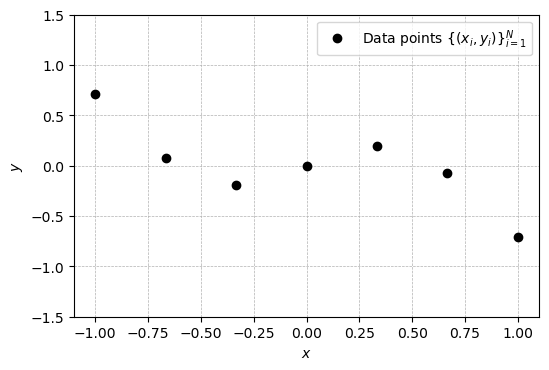

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=3$ (overdetermined) and $n=9$ (underdetermined) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$ by solving optimization problem (1) or equivalently (2) in __Exercise 1__ above.

---
__a)__ First, do this by implementing the GD method. The GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ as the initial point, and try the constant step size

1. $\gamma_{k} = 1 / \beta$,

and run for $10^5$ iterations. Here, $\beta$ is the smoothness parameter from __Exercise 1__ above. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$, (Hint: use [sequential average computation](https://math.stackexchange.com/questions/106313/regular-average-calculated-accumulatively))

as a function of iteration number $k$. Give comments:
- Describe any difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases.

_Hint:_ What is $f(\theta^{*})$ in the overdetermined and underdetermined case, respectively? 

__Solution:__ 

Using the GD method both of the cases converges. Which is shown in the log-linear plots below, changing the degree $n$ to 3 or 9 to see the plots for the over- and underdetermined case respectivelly. In the overdeterminde case, $n=3$, both $f(\theta_{k})-f(\theta^{*})$ and $f(\overline{\theta}_{k})-f(\theta^{*})$ converge significantly quicker than in the underdetermined case, $n=9$. 

[-7.38580399e-17  5.23557283e-01  1.68545997e-16 -1.24520755e+00]


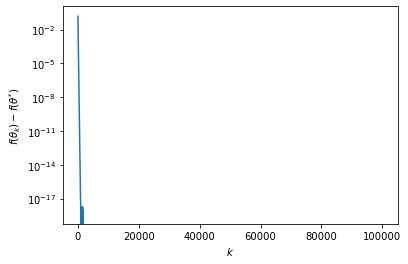

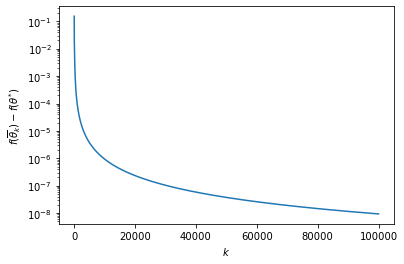

In [8]:
n = 3 #Sets the degree (n=3 for overdetermined case and n=9 for underdetermined)
N = len(xs)
theta = np.zeros(n+1).transpose() #Creates the initial theta

X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X
XTX = XT@X
beta = 2/N*np.linalg.norm(XTX, 2)#Smoothness parameter dependent on X
gamma_k = 1/beta #constant stepsize

theta_sum = theta #sum of all thetas
func_vals = np.array(1/N*np.square(np.linalg.norm(X@theta - ys)))
func_vals_avg = np.array(1/N*np.square(np.linalg.norm(X@theta_sum - ys)))
                     
for k in range(0, pow(10,5)):
    theta = theta - gamma_k*2/N*(XTX@theta-XT@ys)
    theta_sum = theta_sum + theta
    func_vals = np.append(func_vals, 1/N*np.square(np.linalg.norm(X@theta - ys)))
    func_vals_avg = np.append(func_vals_avg, 1/N*np.square(np.linalg.norm(X@theta_sum/(k+1) - ys)))

vals = np.array([func_val - 1/N*np.square(np.linalg.norm(X@theta - ys)) for func_val in func_vals])
plt.yscale('log')
plt.plot(vals)
plt.xlabel('$k$')
plt.ylabel(r'$f(\theta_{k})-f(\theta^{*})$')

plt.figure()
plt.xlabel('$k$')
plt.ylabel(r'$f(\overline{\theta}_{k})-f(\theta^{*})$')
vals_avg = np.array([func_val_avg - 1/N*np.square(np.linalg.norm(X@theta - ys)) for func_val_avg in func_vals_avg])
plt.yscale('log')
plt.plot(vals_avg)
print(theta)
theta_star = theta

---
__b)__ Next, do this by implementing the SGD method. The SGD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots,N\}$ uniformly at random
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f_{i}(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ and try the step sizes

1. $\gamma_{k} = \frac{0.1}{\beta}$,
2. $\gamma_{k} = \frac{0.1}{\beta(k+1)}$,
3. $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$, where $\lfloor \cdot \rfloor$ is the floor function,

and run for $10^5 N$ iterations. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$,

as a function of iteration number $k$. Give comments:
- Does the step sizes matter? 
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
- Which combination worked best? 
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.

__Solution:__ 

Changing the step size gamma we can see that the plots differ and thus step size matters. As before the overdetermined system, $n=3$, converges significantly faster. The combination that worked best was the overdetermined version with step size $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$. An underdetermined neural network should show better performance in training, though it is more prone to overfitting.

[ 4.85020926e-05  5.25575191e-01  5.81336634e-04 -1.24701755e+00]
[-5.83040311e-04  1.73073560e+00  1.11812008e-03 -4.13219160e+00]


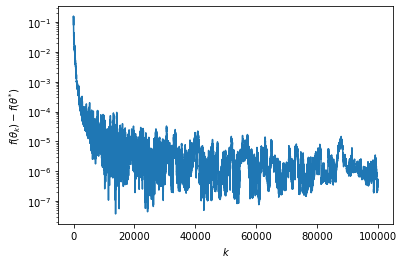

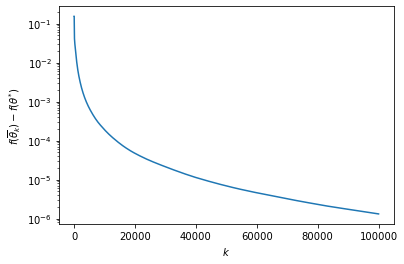

In [15]:
X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X
XTX = XT@X

beta = 2/N*np.linalg.norm(XTX, 2)#Smoothness parameter dependent on X
gamma_k = 0.1/beta #constant stepsize
phi = np.array([np.power(x, np.arange(n+1)) for x in xs])
theta = np.zeros(n+1).transpose() #Creates the initial theta

theta_sum = theta #sum of all thetas
func_vals = np.array(1/N*np.square(np.linalg.norm(X@theta - ys)))
func_vals_avg = np.array(1/N*np.square(np.linalg.norm(X@theta_sum - ys)))

for k in range(0, pow(10, 5)):
    stok = np.random.randint(0, high=7)
    theta = theta - gamma_k*2*np.transpose(X[stok])*(X[stok]@theta-ys[stok])
    theta_sum = theta_sum + theta
    #gamma_k = 0.1/(beta*(k+1)) #step size nr2
    gamma_k = 0.1/(beta*(np.floor(k/1000)+1))
    func_vals = np.append(func_vals, 1/N*np.square(np.linalg.norm(X@theta - ys)))
    func_vals_avg = np.append(func_vals_avg, 1/N*np.square(np.linalg.norm(X@theta_sum/(k+1) - ys)))
    
vals = np.array([func_val - 1/N*np.square(np.linalg.norm(X@theta_star - ys)) for func_val in func_vals])
plt.yscale('log')
plt.plot(vals)
plt.xlabel('$k$')
plt.ylabel(r'$f(\theta_{k})-f(\theta^{*})$')


plt.figure()
vals_avg = np.array([func_val_avg - 1/N*np.square(np.linalg.norm(X@theta_star - ys)) for func_val_avg in func_vals_avg])
plt.yscale('log')
plt.plot(vals_avg)
plt.xlabel('$k$')
plt.ylabel(r'$f(\overline{\theta}_{k})-f(\theta^{*})$')
print(theta)
print(theta_sum/(30000))

---
### Exercise 3: Fitting points in $\mathbb{R}$ using fully connected feedforward neural networks

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:


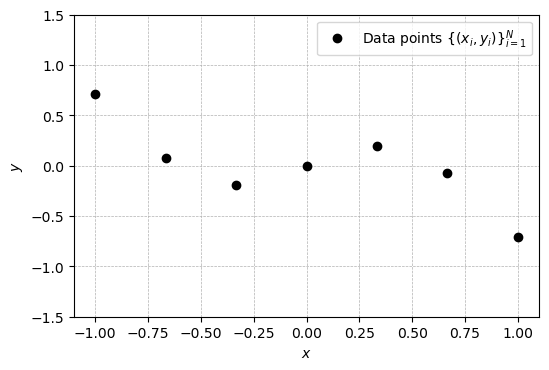

In [16]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

Polynomial fitting as in __Exercise 1__ and __Exercise 2__ gives:

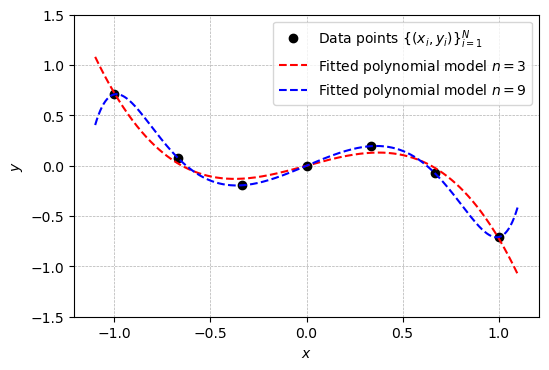

In [17]:
theta_star_n_9 = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
theta_star_n_3 = np.array([0,  0.523557283,  0, -1.24520755])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star_n_3), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star_n_9), x),'b--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial model $n=3$', r'Fitted polynomial model $n=9$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In this exercise, we are going to explore fitting of these data points using fully connected feedforward neural networks. We will do this by considering the problem

$$
\begin{align}\label{eq:3}\tag{3}
		\underset{\theta}{\mathrm{minimize}} \frac{1}{N}\sum_{i=1}^N L(m(x_i;\theta),y_i)
\end{align}
$$

where $L:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is the least squares loss, i.e.

$$
\begin{align*}
L(u,y) = (u-y)^{2}
\end{align*}
$$

for each $u,y\in\mathbb{R}$ and $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ is a fully connected feedforward neural network model, i.e.

$$
\begin{align*}
m(x;\theta) = W_{D}\sigma_{D-1}(W_{D-1}\sigma_{D-2}(...\sigma_1(W_1 x + b_{1})...)+b_{D-1})+b_{D}	
\end{align*}
$$

for each $x\in\mathbb{R}$, where $\sigma_i$ is an activation functions that act elements-wise, for each $i=1,\ldots,D-1$, and

$$
\begin{align*}
    \theta = (W_{1},b_1,\ldots,W_{D},b_{D})
\end{align*}
$$

such that

$$
\begin{align*}
    \begin{cases}
        W_{1}\in\mathbb{R}^{f_{1} \times 1}& \text{ and }\quad b_{1} \in\mathbb{R}^{f_1}\\	
        W_{i}\in\mathbb{R}^{f_{i} \times f_{i-1}}& \text{ and }\quad b_{i} \in\mathbb{R}^{f_i} \quad\text{ for }\quad i=2,\ldots,D-1 \\
        W_{D}\in\mathbb{R}^{1 \times f_{D-1}}& \text{ and }\quad b_{D} \in\mathbb{R}.
    \end{cases}
\end{align*}
$$

In particular, we will study how the trained model $m(\cdot;\theta)$ depends on:
- The widths ($f_{i}$) and depth ($D$)
- Different activation functions ($\sigma_{i}$)
- Different initial points $\theta_{0}$ used in training
- Different training algorithms such as SGD and and Adam

We will also study:
- How the loss landscape of (3) looks along different directions at an "optimal point" of (3). (Note that we in general have no guarantees that our optimization algorithms will reach a true optimal point of (3) since the problem in nonconvex in general.)

_Remark:_
We will train the models using `pytorch`. `pytorch` is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate neural networks.

- You will need to [install](https://anaconda.org/pytorch/pytorch) `pytorch`

Take a quick look at `pytorch`'s
- [tutorials](https://pytorch.org/tutorials/)
- [documentation](https://pytorch.org/docs/stable/index.html)

---
`pytorch` expects to get data from a `DataLoader` object. Below we create a `DataLoader` and provide it with our data:

In [18]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

Typically in `pytorch`, models are defined as a child of the `nn.Module` class. Below, we create a model with:
- Depth $D=2$
- Width $f_1=10$
- ReLU as activation function 

In [19]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=10, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model()

In machine learning, the objective function in (3) is sometimes itself called a loss function. In fact, it is already [implemented](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in `pytorch` and we create the corresponding loss function object below:

In [20]:
loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)

`torch.optim` is a `pytorch` package implementing various optimization algorithms. Below we create an optimizer object that allows us to take a SGD step with step-size/learning rate equal to $0.05$.

In [21]:
optimizer = optim.SGD(model.parameters(), lr=0.05) #An stochastic-gradient descent optimization algorithm object

Once we have defined the data loader, the model, the loss function and the optimizer as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one training step.

We will do this for $2000$ epochs.

In [22]:
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

C:\ProgramData\Anaconda3\lib\site-packages\torch\autograd\__init__.py:173: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0	Loss: 0.18636299669742584
Epoch: 100	Loss: 0.061131563037633896
Epoch: 200	Loss: 0.05335693433880806
Epoch: 300	Loss: 0.048790015280246735
Epoch: 400	Loss: 0.04417920112609863
Epoch: 500	Loss: 0.03936942666769028
Epoch: 600	Loss: 0.03451884165406227
Epoch: 700	Loss: 0.029694968834519386
Epoch: 800	Loss: 0.025143275037407875
Epoch: 900	Loss: 0.020961863920092583
Epoch: 1000	Loss: 0.01731172204017639
Epoch: 1100	Loss: 0.0142298499122262
Epoch: 1200	Loss: 0.011666901409626007
Epoch: 1300	Loss: 0.009610539302229881
Epoch: 1400	Loss: 0.007986464537680149
Epoch: 1500	Loss: 0.006723240949213505
Epoch: 1600	Loss: 0.005698082037270069
Epoch: 1700	Loss: 0.004850264173001051
Epoch: 1800	Loss: 0.004134898539632559
Epoch: 1900	Loss: 0.0035290319938212633


Below we plot trained model:

Traing loss: 0.00301


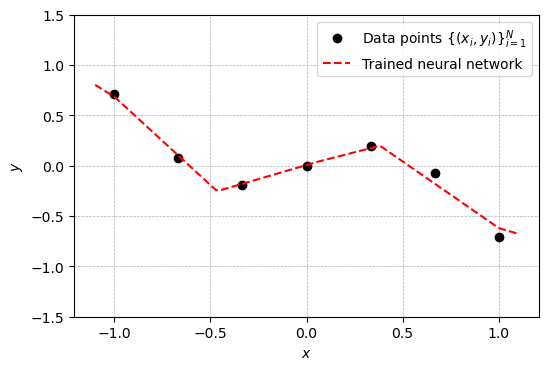

In [23]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__a)__ First, we experiment with the widths ($f_{i}$) and depth ($D$).

Choose widths ($f_{i}$) and depth ($D$) such that:
- the network becomes underparameterized (motive why it is underparameterized)
- the network becomes overparameterized (motive why it is overparameterized)

and train the model as above.

In this subproblem, keep the activation functions fixed as ReLU. However, you are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

To create the underparameterized network the depth, $D$, is set to 2 and the width $f_{i}$ is set to 1. This gives a total of four parameters, 2 weights and 2 biases, which is less than the number of training examples, $N=7$. For the overparameterized networkteh detpth is still set to 2 but the width is changed to 10. This gives a total of 31 parameters which is significantly bigger than the number of training examples, $N=7$.

In theory the the overparameterized network should show better performance in training. Looking at the printouts of the loss funciton values from the two networks it is clear that, as expected, the overpararameterized network converge quickly and accurately while the underparameterized network never reaches a lower loss function value than $\approx 0.156$. It should however be noted that  the overparameterized network may be prone to overfitting.

In [24]:
#Underparameterized model
#We have D=2 and f1=1 which gives 4 parameters in total which is smaller than the number of training examples, N=7.
class model_under(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=1)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=1, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x


#Creates an instance of the underparameterized model
model = model_under()

nr_lr = 0.05    #Evaluate for different values
nr_epoch = 2000    #Evaluate for different values 

loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)
optimizer = optim.SGD(model.parameters(), lr = nr_lr) #An stochastic-gradient descent optimization algorithm object

#Runs the algorithm
for epoch in range(nr_epoch):
    losses_in_epoch = []
    for batch in data_loader:
    
        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
            
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
            
        # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
        loss = loss_fn(pred, batch_y)
            
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()
    
    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))


Epoch: 0	Loss: 0.9793799519538879
Epoch: 100	Loss: 0.1556757539510727
Epoch: 200	Loss: 0.1556757688522339
Epoch: 300	Loss: 0.1556757688522339
Epoch: 400	Loss: 0.1556757688522339
Epoch: 500	Loss: 0.1556757688522339
Epoch: 600	Loss: 0.1556757688522339
Epoch: 700	Loss: 0.1556757688522339
Epoch: 800	Loss: 0.1556757688522339
Epoch: 900	Loss: 0.1556757688522339
Epoch: 1000	Loss: 0.1556757688522339
Epoch: 1100	Loss: 0.1556757688522339
Epoch: 1200	Loss: 0.1556757688522339
Epoch: 1300	Loss: 0.1556757688522339
Epoch: 1400	Loss: 0.1556757688522339
Epoch: 1500	Loss: 0.1556757688522339
Epoch: 1600	Loss: 0.1556757688522339
Epoch: 1700	Loss: 0.1556757688522339
Epoch: 1800	Loss: 0.1556757688522339
Epoch: 1900	Loss: 0.1556757688522339


In [26]:
#Overparameterized model
#We have D=2 and f1=10 which gives 31 parameters in total which is larger than the number of training examples, N=7.

class model_over(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=10, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x
    
#Creates an instance of the overparameterized model
model = model_over()

nr_lr = 0.05      #Evaluate for different values
nr_epoch = 2000   #Evaluate for different values 

loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)
optimizer = optim.SGD(model.parameters(), lr = nr_lr) #An stochastic-gradient descent optimization algorithm object

#Runs the algorithm
for epoch in range(nr_epoch):
    losses_in_epoch = []
    for batch in data_loader:
    
        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
            
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
            
        # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
        loss = loss_fn(pred, batch_y)
            
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()
    
    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))


Epoch: 0	Loss: 0.13778714835643768
Epoch: 100	Loss: 0.05841022729873657
Epoch: 200	Loss: 0.055232610553503036
Epoch: 300	Loss: 0.052258510142564774
Epoch: 400	Loss: 0.04933672025799751
Epoch: 500	Loss: 0.0461561493575573
Epoch: 600	Loss: 0.04279295727610588
Epoch: 700	Loss: 0.03930366784334183
Epoch: 800	Loss: 0.03578796610236168
Epoch: 900	Loss: 0.0322948656976223
Epoch: 1000	Loss: 0.028945228084921837
Epoch: 1100	Loss: 0.025726022198796272
Epoch: 1200	Loss: 0.02272816188633442
Epoch: 1300	Loss: 0.019938791170716286
Epoch: 1400	Loss: 0.0174047090113163
Epoch: 1500	Loss: 0.015100745484232903
Epoch: 1600	Loss: 0.01308024674654007
Epoch: 1700	Loss: 0.011291349306702614
Epoch: 1800	Loss: 0.009760407730937004
Epoch: 1900	Loss: 0.008453087881207466


__b)__ Second, we will try out different activation functions ($\sigma_{i}$).

Train two overparameterized networks with the same widths and depth, using
- ReLU activation at each layer for one of the networks, and
- 4 * sigmod activation at each layer for the other network.

You are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

Looking at the printouts of the loss functions for both the ReLU-based, and the Sigmoid-based network it is clear that the ReLU version has better performance. This can have a couple of different explanation.

The gradient of a sigmoid function has a relatively narrow window where it is non-zero. As soon as the input value reaches one of the platues the gradient gets so low that it is almost pointless to backpropagate through it as the steps become very small. In comparison a ReLU model has gradient 1 for all input values bigger than zero leading to more consistent step-sizes when backpropagating. On top of this a Sigmoids gradient values can be low even when the input value is inside the non-zero window, for a 1 * Sigmoid it will always be $0<\nabla \sigma < 1$, which again decreases step size. This has a bigger effect on deeper networks however where multiple activation functions with gradients less than one can lead to exponentially smaller steps. On top of this some of the effect should be negated by using a 4 * times sigmoid modell.

It should also be noted that ReLU should be quicker as choosing the biggest value of 0 and x requires significantly less computational power than calculation a sigmoid.

In [27]:
#Overparameterized model with ReLU activation function
#We have D=2 and f1=10 which gives 31 parameters in total which is larger than the number of training examples, N=7.

class model_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=10, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x
    
#Creates an instance of the overparameterized model
model = model_relu()

nr_lr = 0.05      #Evaluate for different values
nr_epoch = 2000   #Evaluate for different values 

loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)
optimizer = optim.SGD(model.parameters(), lr = nr_lr) #An stochastic-gradient descent optimization algorithm object

#Runs the algorithm
for epoch in range(nr_epoch):
    losses_in_epoch = []
    for batch in data_loader:
    
        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
            
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
            
        # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
        loss = loss_fn(pred, batch_y)
            
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()
    
    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))


Epoch: 0	Loss: 0.17203852534294128
Epoch: 100	Loss: 0.06514345109462738
Epoch: 200	Loss: 0.05843576043844223
Epoch: 300	Loss: 0.05509766936302185
Epoch: 400	Loss: 0.05212699994444847
Epoch: 500	Loss: 0.04900896176695824
Epoch: 600	Loss: 0.04553278535604477
Epoch: 700	Loss: 0.041575368493795395
Epoch: 800	Loss: 0.03715074807405472
Epoch: 900	Loss: 0.032419778406620026
Epoch: 1000	Loss: 0.027572419494390488
Epoch: 1100	Loss: 0.022855373099446297
Epoch: 1200	Loss: 0.01852443814277649
Epoch: 1300	Loss: 0.014746692962944508
Epoch: 1400	Loss: 0.011609205044806004
Epoch: 1500	Loss: 0.009059772826731205
Epoch: 1600	Loss: 0.006994698662310839
Epoch: 1700	Loss: 0.0053293113596737385
Epoch: 1800	Loss: 0.003998385276645422
Epoch: 1900	Loss: 0.0029503696132451296


In [28]:
#Overparameterized model with 4*sigmod activation function
#We have D=2 and f1=10 which gives 31 parameters in total which is larger than the number of training examples, N=7.

class model_sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=10, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model

    def forward(self, x):
        x = self.linear1(x)
        x = 4*F.sigmoid(x)
        x = self.linear2(x)
        return x
    
#Creates an instance of the overparameterized model
model = model_sigmoid()

nr_lr = 0.05      #Evaluate for different values
nr_epoch = 2000   #Evaluate for different values 

loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)
optimizer = optim.SGD(model.parameters(), lr = nr_lr) #An stochastic-gradient descent optimization algorithm object

#Runs the algorithm
for epoch in range(nr_epoch):
    losses_in_epoch = []
    for batch in data_loader:
    
        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
            
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
            
        # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
        loss = loss_fn(pred, batch_y)
            
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()
    
    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0	Loss: 0.28163066506385803
Epoch: 100	Loss: 0.11329168826341629
Epoch: 200	Loss: 0.08878231793642044
Epoch: 300	Loss: 0.07564940303564072
Epoch: 400	Loss: 0.07017123699188232
Epoch: 500	Loss: 0.06839440762996674
Epoch: 600	Loss: 0.0679113045334816
Epoch: 700	Loss: 0.06778805702924728
Epoch: 800	Loss: 0.06775243580341339
Epoch: 900	Loss: 0.06773686408996582
Epoch: 1000	Loss: 0.06772581487894058
Epoch: 1100	Loss: 0.06771580874919891
Epoch: 1200	Loss: 0.06770619004964828
Epoch: 1300	Loss: 0.06769674271345139
Epoch: 1400	Loss: 0.06768741458654404
Epoch: 1500	Loss: 0.06767822057008743
Epoch: 1600	Loss: 0.06766919046640396
Epoch: 1700	Loss: 0.06766020506620407
Epoch: 1800	Loss: 0.06765135377645493
Epoch: 1900	Loss: 0.06764258444309235


__c)__ Third, we consider different initial points ($\theta_{0}$) used in training.


For an overparameterized network with ReLU activation functions at each layer and fixed widths and depth, train it with different initial point (note that the constructor of `nn.Module` will initialize the parameters randomly).

Does the initial point affect the final trained network? Give a qualitative and quantitative analysis.

__Solution:__ 

Looking at the final value for the loss function after 2000 epochs for a couple of different random choices of initial points it is clear that it has an effect on the convergence. This makes sense as finding a minima should take a larger number of iterations the further away from it the training is initialized.

In [235]:
# Write your code here
#Overparameterized model with ReLU activation function
#We have D=2 and f1=10 which gives 31 parameters in total which is larger than the number of training examples, N=7.

class model_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=10, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x
for i in range (0,3):
    #Creates an instance of the overparameterized model
    model = model_relu()

    # Hint: The code below prints the parameters of the network 'model' aka theta_0 since we haven't run the algorithm below
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.data)

    nr_lr = 0.05      #Evaluate for different values
    nr_epoch = 2000   #Evaluate for different values 

    loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)
    optimizer = optim.SGD(model.parameters(), lr = nr_lr) #An stochastic-gradient descent optimization algorithm object

    #Runs the algorithm
    for epoch in range(nr_epoch):
        losses_in_epoch = []
        for batch in data_loader:

            # 1. These are the sampled batches of inputs and ground-truth
            batch_x, batch_y = batch

            # 2. Compute the model's prediction on the batch
            pred = model(batch_x)

            # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
            loss = loss_fn(pred, batch_y)

            # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
            losses_in_epoch.append(loss)

            # 4. Backpropagation
            loss.backward()

            # 5. One step of SGD
            optimizer.step()

            # Zero the gradients computed in the backpropagation, for starting new optimization step
            optimizer.zero_grad()

    # Prints last value for loss function
    print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)), '\n')

linear1.weight tensor([[-0.1154],
        [ 0.7806],
        [ 0.3180],
        [ 0.1728],
        [ 0.1636],
        [ 0.8840],
        [ 0.8636],
        [-0.0302],
        [-0.1172],
        [-0.9992]])
linear1.bias tensor([-0.3305, -0.6743, -0.8940, -0.1591,  0.1675, -0.1863,  0.9425,  0.1034,
         0.5866,  0.0911])
linear2.weight tensor([[-0.0130, -0.0391,  0.1108, -0.1619,  0.1990,  0.0946, -0.1716, -0.2619,
         -0.0510,  0.2169]])
linear2.bias tensor([-0.2376])
Epoch: 1999	Loss: 0.00019998916832264513 

linear1.weight tensor([[ 0.8526],
        [-0.7212],
        [ 0.4843],
        [-0.0249],
        [-0.3552],
        [ 0.7157],
        [ 0.1093],
        [-0.0026],
        [-0.7274],
        [-0.6820]])
linear1.bias tensor([-0.0037,  0.9901,  0.1334, -0.9513,  0.8653,  0.2426,  0.6476, -0.9150,
         0.3825, -0.5252])
linear2.weight tensor([[ 0.0097, -0.2727,  0.0797, -0.1713,  0.0631,  0.1870, -0.2731, -0.1214,
          0.2611, -0.2220]])
linear2.bias tensor([-0.

__d)__ Fourth, we consider different training algorithms.

Compare
- SGD, and
- Adam (`optimizer = optim.Adam(model.parameters(), lr=0.1)`)

for an overparameterized network with ReLU activation functions at each layer and fixed widths and depth.

You are free to experiment with the learning rates and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

Running the network a couple of times with both SGD and Adam optimization models the Adam version consistentently converges at a faster rate than the SGD version. As mentioned further down in the instructions for this assignment Adam is a version of SGD where the gradient is scaled individually in each coordinate, leading to bigger steps, which is meant to increase performance. In our case it seems to work better but it is not possible to draw any general conclusions about the models from this, very limited, test. It should also be noted that no tests are performed to se how well the models generalize to new data.

In [238]:
#Overparameterized model with ReLU activation function with SGD or Adam optimizer
#We have D=2 and f1=10 which gives 31 parameters in total which is larger than the number of training examples, N=7.

class model_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=10, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x
    
#Creates an instance of the overparameterized model
model = model_relu()

nr_lr = 0.05     #Evaluate for different values
nr_epoch = 2000   #Evaluate for different values 

loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)
#optimizer = optim.SGD(model.parameters(), lr = nr_lr) #A stochastic-gradient descent optimization algorithm object
optimizer = optim.Adam(model.parameters(), lr=nr_lr) #An Adam descent optimization algorithm object

#Runs the algorithm
for epoch in range(nr_epoch):
    losses_in_epoch = []
    for batch in data_loader:
    
        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
            
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
            
        # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
        loss = loss_fn(pred, batch_y)
            
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()
    
    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.16897514462471008
Epoch: 100	Loss: 3.117247615591623e-05
Epoch: 200	Loss: 4.964820776720558e-10
Epoch: 300	Loss: 8.304864974428665e-15
Epoch: 400	Loss: 7.322912214764374e-14
Epoch: 500	Loss: 9.433426262361877e-15
Epoch: 600	Loss: 1.0279475804364415e-14
Epoch: 700	Loss: 1.8691892787270695e-14
Epoch: 800	Loss: 4.05315666825775e-14
Epoch: 900	Loss: 1.4227210921413484e-14
Epoch: 1000	Loss: 7.153008247566886e-14
Epoch: 1100	Loss: 3.0878331926942337e-06
Epoch: 1200	Loss: 1.6348011833144938e-10
Epoch: 1300	Loss: 1.3112689600802696e-07
Epoch: 1400	Loss: 9.778925402770255e-08
Epoch: 1500	Loss: 7.124856260531942e-12
Epoch: 1600	Loss: 2.0334746864136832e-07
Epoch: 1700	Loss: 7.577129895741663e-12
Epoch: 1800	Loss: 0.0014662800822407007
Epoch: 1900	Loss: 2.8432054932636674e-08


__e)__ Fifth, we study the loss landscape of a trained network along different directions in parameter space.  


Train an overparameterized network with ReLU activation functions at each layer. Denote it by $m(\cdot,\theta^{*})$ where $\theta^{*}$ are the learned parameters. Sample $\Delta$, with the same size as $\theta^{*}$, from a standard normal distribution (and keep it fixed). Plot 

$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)
\end{align*}
$$

as a function of $t\in[-1,1]$ (or even a larger interval). 

Do the same for another network with the same widths and depth, but using 4 * sigmoid activation functions at each layer. 

How does these two cases differ? Give a qualitative analysis. 

_Hints:_ You can get the parameters as a dictionary of a model by using `model.state_dict()`, updating the parameters in the dictionary, and then loading the updated parameters into the model using `model.load_state_dict(...)`. If you use this approach it is helpful to know the difference between [a shallow copy and a deep copy of a dictionary](https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/) You might need to cut off values of the loss that are too high to get a nice plot.

_Optional:_ Plot in two direction at the same time, i.e. plot 
$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta_{t} + s \Delta_{s}\right),y_i\right)
\end{align*}
$$

as a function of $t,s\in[-1,1]$. 

__Solution:__ 

The plot does not seem to give a valid answer and we can therefore not draw any conclusions.

[2.87456760e+01 2.18031296e+02 7.29976379e+02 1.75374341e+03
 3.45242188e+03 5.98667627e+03 9.47910742e+03 1.40058564e+04
 1.95957871e+04 2.62278652e+04 3.38321914e+04 4.22931953e+04
 5.14550820e+04 6.11275859e+04 7.10928281e+04 8.11145703e+04
 9.09462656e+04 1.00339430e+05 1.09052148e+05 1.16856977e+05
 1.23547930e+05 1.28947250e+05 1.32910797e+05 1.35332328e+05
 1.36146828e+05 1.35332328e+05 1.32910797e+05 1.28947250e+05
 1.23547930e+05 1.16856977e+05 1.09052148e+05 1.00339398e+05
 9.09462422e+04 8.11145703e+04 7.10928281e+04 6.11275898e+04
 5.14550820e+04 4.22931875e+04 3.38321875e+04 2.62278652e+04
 1.95957852e+04 1.40058564e+04 9.47910449e+03 5.98667529e+03
 3.45242163e+03 1.75374402e+03 7.29976685e+02 2.18031296e+02
 2.87457066e+01 4.04491992e-04]


Text(0, 0.5, 'Loss')

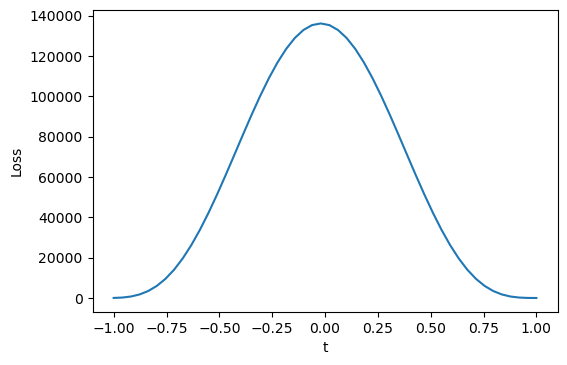

In [101]:
import copy

#Overparameterized model with ReLU activation function with SGD or Adam optimizer
#We have D=2 and f1=10 which gives 31 parameters in total which is larger than the number of training examples, N=7.

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)    #Input 1 and output 10 - input layer to hidden layer
        self.linear2 = nn.Linear(in_features=10, out_features=1)    #input 10 and output 1 - hidden layer to output layer 

#Forwards the data one epoch
#x: data in
#Returns: output of model

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        #x = 4*F.sigmoid(x)
        x = self.linear2(x)
        return x
    
#Creates an instance of the overparameterized model
model = model()

nr_lr = 0.1     #Evaluate for different values
nr_epoch = 2000   #Evaluate for different values 

loss_fn = nn.MSELoss() #The loss function for the model (mean-square-error, same as before)
#optimizer = optim.SGD(model.parameters(), lr = nr_lr) #A stochastic-gradient descent optimization algorithm object
optimizer = optim.Adam(model.parameters(), lr=nr_lr) #An Adam descent optimization algorithm object

#Runs the algorithm
for epoch in range(nr_epoch):
    losses_in_epoch = []
    for batch in data_loader:
    
        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
            
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
            
        # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
        loss = loss_fn(pred, batch_y)
            
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()
        
#Generate the delta
theta = model.state_dict()
delta = copy.deepcopy(theta)

for key in delta.keys():
    #print(theta[key].size())
    if len(theta[key].size()) < 2:
        delta[key] = torch.randn(delta[key].size(dim=0))
    else:
        delta[key] = torch.randn(delta[key].size(dim=0), delta[key].size(dim=1))

t = np.linspace(-1,1)

loss_vector = np.zeros(len(t))

for i in range (len(t)):
    theta_new = copy.deepcopy(theta)
    
    #Creates new theta=theta+t*delta
    for key in theta_new.keys():
        theta_new[key] = theta[key] + t[i]*delta[key]
    
    model.load_state_dict(theta_new)  #loads the updatedet parameters into the model
    
    # 1. These are the sampled batches of inputs and ground-truth
    batch_x, batch_y = batch

    # 2. Compute the model's prediction on the batch
    pred = model(batch_x)

    # 3. Compute the loss of the prediction w.r.t. ground-truth (in our case the y)
    loss_vector[i] = loss_fn(pred, batch_y)

print(loss_vector)
#plots the loss function against t in [-1,1]
fig, axes = plt.subplots(dpi=100)
axes.plot(t, loss_vector)
axes.set_xlabel("t")
axes.set_ylabel("Loss")

---
### Exercise 4: Implicit regularization via small norm in polynomial fitting in $\mathbb{R}$
_Remark:_ You should solve this exercise using `numpy` primarily.

The purpose of this exercise is to study optimization problems in the overparameterized regime, i.e., when there are multiple solutions to choose from, and see how the norm of a given solution may affect generalization.   

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

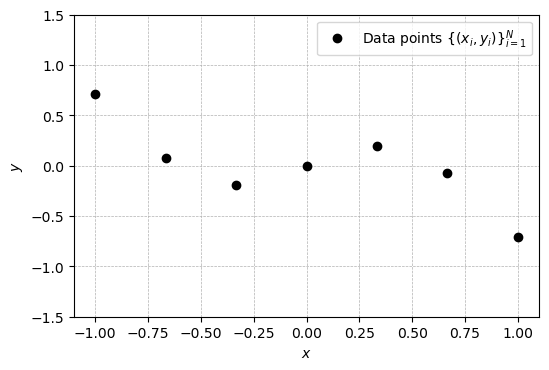

In [102]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=9$ (overparameterized) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$. One solution $m(\cdot;\theta^{*})$ is given below:

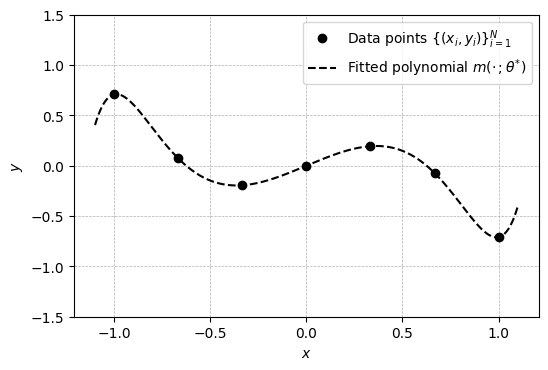

In [19]:
theta_star = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__a)__ Recall from __Exercise 1__ __g)__ that given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the Euclidean projection formula $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$. Initialize $a$ randomly and compute the projection $\theta^{*}$ and plot the fitted polynomial $m(\cdot;\theta^{*})$ as above. Vary the magnitude or norm of $\theta^{*}$ indirectly by multiplying $a$ by $0$, $10$, $100$ and $1000$. Visually, how does the generalization of $m(\cdot;\theta^{*})$ correspond to the norm of $\theta^{*}$?

__Solution:__ 

It is clear looking at the graph below that a bigger norm leads to worse realization with the biggest norms barely seeming to be fitted to the data. There also seems to be a tradeoff between generalisation and training error when comparing the 1 * a and 0 * a models. The 1 * a model fits the data perfectly but turns down at the first datapoint and up at the last, contrary to what the training data seems to suggest. The 0 * a models still has a downwards trajectory at the first datapoint but an upward one at the last which seems to correspond more generally to the dataset.

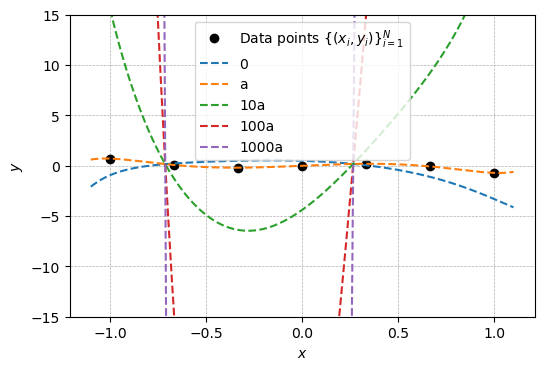

[ 0.48751918 -0.56926726 -1.95246585 -0.92969147 -0.17043211 -0.23015856
 -0.19587241  0.17626956 -0.29800758  0.36751813]
[-3.39728246e-14  8.44863444e-01 -8.41120076e-04 -2.45062616e+00
  1.03037209e-02  7.78481903e-01 -2.64952824e-02 -4.62257609e-01
  1.70326815e-02  5.80983894e-01]
[ -4.3876726   13.57203976  17.56378143 -16.13903833   1.6369262
   9.85624608   1.49789887  -6.20900213   2.852395     2.5021758 ]
[ -48.26439862  140.84380293  193.21000699 -153.02316003   17.903151
  100.63388781   16.74184038  -63.67644739   31.20601822   21.71409491]
[ -487.03165877  1413.56143465  1949.67226249 -1521.8643771
   180.56539895  1008.41030512   169.18125546  -638.35089994
   314.74225038   213.83328592]


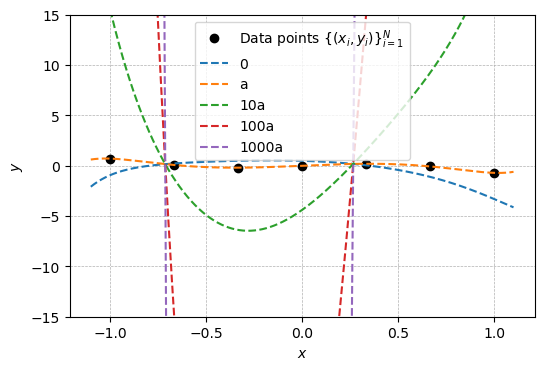

In [242]:
n = 9 # degree
a = np.random.randn(n + 1)

# Calculating theta_star via the Euclidian projection formula
X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X

a_scale = [0,1,10,100,1000]
theta_vect = []

for i in range (0,5):
    theta_star = a*a_scale[i] - XT@np.linalg.inv(X@XT)@(X@a-ys)
    theta_vect.append(theta_star)
    print(theta_star)

x = np.linspace(-1.1, 1.1, num = 1000)
fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')


for i in range (0,len(theta_vect)):
    axes.plot(x, np.polyval(np.flip(theta_vect[i]), x), '--')
    
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', '0', 'a', '10a', '100a', '1000a'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-15, 15]);

__b)__ Implement the GD method for optimization problem (2) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 1/\beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the GD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.

_Remark:_ We consider $\theta_{k}$ to have converged to $\theta^{*}$ if $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.


__Solution:__ 
 
As seen in the graph below the norm of the difference between $\theta_k$ given by the GD-method and $\theta^*$ given by the euclidian projection with $a=0$ converges to 0. In other words, the GD-method converges to the smallest norm solution.
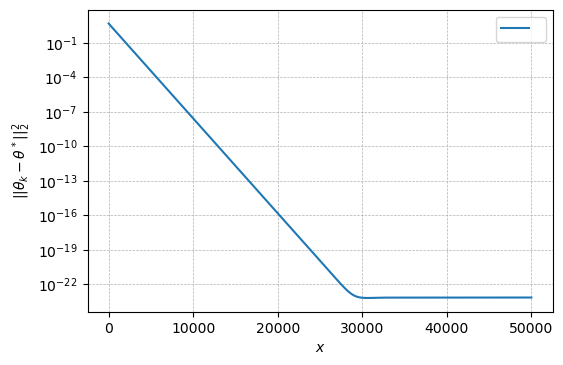

It converges


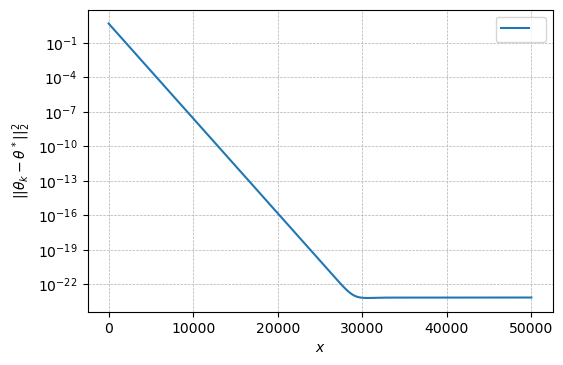

In [29]:
#Implementing gradient descent method
n = 9 #Sets the degree
N = len(xs)
theta = np.zeros(n+1).transpose() #Creates the initial theta

X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X
XTX = XT@X
beta = 2/N*np.linalg.norm(XTX, 2)#Smoothness parameter dependent on X
gamma_k = 1/beta #constant stepsize

a = np.zeros(n+1)
theta_star = a - XT@np.linalg.inv(X@XT)@(X@a-ys) #theta_star from euclidian projection

theta_norms = []
theta_norm = 1
                     
for i in range (0,50000):
    theta = theta - gamma_k*2/N*(XTX@theta-XT@ys)
    theta_norm = np.square(np.linalg.norm(theta-theta_star))
    theta_norms.append(theta_norm)

fig, axes = plt.subplots(dpi=100)
axes.plot(theta_norms)
axes.legend([r''])
axes.set_yscale('log')
axes.set_xlabel('$x$')
axes.set_ylabel(r'$||\theta_k-\theta^*||_2^2$')
axes.grid(linestyle='dashed', linewidth=0.5)

#checking if it converges
if theta_norm <= pow(10,-16):
    print('It converges')
else:
    print('It did not converge')

---

__c)__ Implement the SGD method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 0.1 / \beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the SGD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.


__Solution:__ 

As seen in the graph below the norm of the difference between $\theta_k$ given by the SGD-method and $\theta^*$ given by the euclidian projection with $a=0$ converges to 0. In other words, the SGD-method converges to the smallest norm solution.
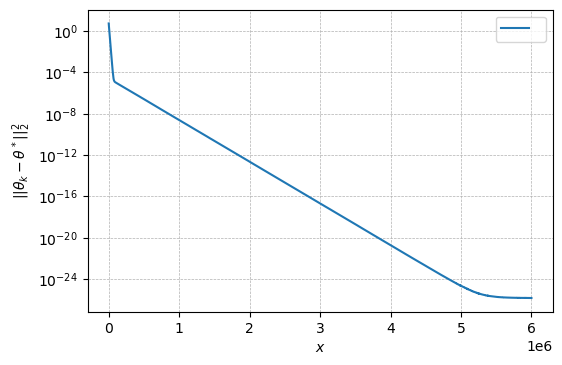

It converges! #Wohoo


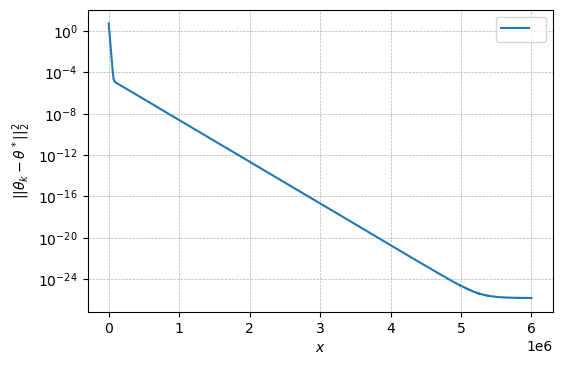

In [30]:
#Implementing gradient descent method
n = 9 #Sets the degree
N = len(xs)
theta = np.zeros(n+1).transpose() #Creates the initial theta

X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X
XTX = XT@X
beta = 2/N*np.linalg.norm(XTX, 2)#Smoothness parameter dependent on X
gamma_k = 0.1/beta #constant stepsize

a = np.zeros(n+1)
theta_star = a - XT@np.linalg.inv(X@XT)@(X@a-ys) #theta_star from euclidian projection

theta_norms = []
theta_norm = 1
                     
for i in range (0,6*pow(10, 6)):
    stok = np.random.randint(0, high=7)
    theta = theta - gamma_k*2*np.transpose(X[stok])*(X[stok]@theta-ys[stok])
    theta_norm = np.square(np.linalg.norm(theta-theta_star))
    theta_norms.append(theta_norm)

fig, axes = plt.subplots(dpi=100)
axes.plot(theta_norms)
axes.legend([r''])
axes.set_yscale('log')
axes.set_xlabel('$x$')
axes.set_ylabel(r'$||\theta_k-\theta^*||_2^2$')
axes.grid(linestyle='dashed', linewidth=0.5)

#checking if it converges
if theta_norm <= pow(10,-16):
    print('It converges! #Wohoo')
else:
    print('It did not converge')

---

__d)__ The ADAM optimization method is given by:

- Pick $\theta_{0}\in\mathbb{R}^{n+1}$, $\hat{m}_{0}=\hat{v}_{0}=0\in\mathbb{R}^{n+1}$, $b_{m},b_{v}\in(0,1)$ and $\gamma,\epsilon>0$.
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots, N\}$ uniformly at random
    - Set $g_{k+1} = \nabla f_{i}(\theta_{k})$
    - Set $\hat{m}_{k+1} = b_{m}\hat{m}_{k}+(1-b_{m})g_{k+1}$
    - Set $\hat{v}_{k+1} = b_{v}\hat{v}_{k}+(1-b_{v})g_{k+1}^{2}$ (element-wise square)
    - Set $m_{k+1}=\hat{m}_{k+1}/(1-b_{m}^{k+1})$
    - Set $v_{k+1}=\hat{v}_{k+1}/(1-b_{v}^{k+1})$
    - Set $\theta_{k+1} = \theta_{k} - \gamma m_{k+1} ./ (\sqrt{v_{k+1}} + \epsilon\mathbb{1})$ (element-wise division and square root)

Use the [suggested values](https://arxiv.org/pdf/1412.6980.pdf):

- $b_{m} = 0.9$
- $b_{v} = 0.999$
- $\gamma = 0.001$
- $\epsilon = 10^{-8}$

Implement the ADAM optimization method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$. Does ADAM converge to the minimum norm solution? Plot the resulting model.

__Solution:__ 

As seen in the graph below the norm of the difference between $\theta_k$ given by the Adam-method and $\theta^*$ given by the euclidian projection with $a=0$ does not converges to 0. In other words, the Adam-method does not converge to the smallest norm solution. This is to be expected as the Adam scales the coordinates in the gradient which will result in a solution with a scaled norm compared to the minimum one.
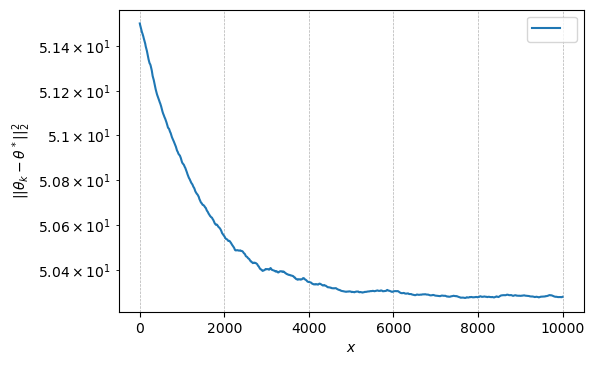

It did not converge


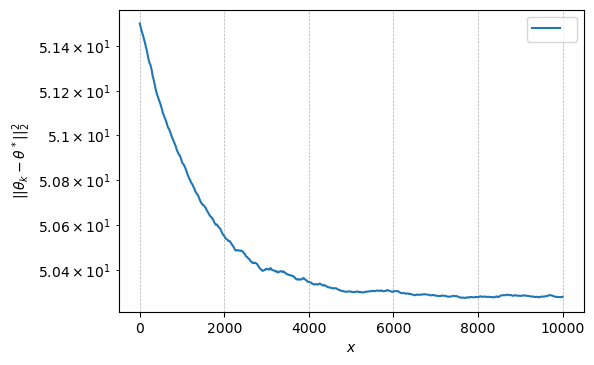

In [31]:
#Implementing gradient descent method
n = 9 #Sets the degree
N = len(xs)
theta = np.zeros(n+1).transpose() #Creates the initial theta
m_hat = np.zeros(n+1).transpose() #Creates the initial m_hat
v_hat = np.zeros(n+1).transpose() #Creates the initial v_hat

bm = 0.9
bv = 0.999
gamma = 0.001
epsi = pow(10, -8)

a = np.zeros(n+1)
theta_star = a - XT@np.linalg.inv(X@XT)@(X@a-ys) #theta_star from euclidian projection

theta_norms = []
theta_norm = 1

X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X
XTX = XT@X

for k in range (0, 10000):
    i = np.random.randint(0, high=N)
    gk1 = 2*np.transpose(X[i])*(X[i]@theta-ys[i])
    m_hat = bm*m_hat+(1-bm)*gk1
    v_hat = bv*v_hat+(1-bm)*np.square(gk1)
    m = m_hat/(1-pow(bm, k+1))
    v = v_hat/(1-pow(bv,k+1))
    theta = theta - np.divide(gamma*m, np.sqrt(v) + epsi*np.eye(n+1))
    theta_norm = np.square(np.linalg.norm(theta-theta_star))
    theta_norms.append(theta_norm)

fig, axes = plt.subplots(dpi=100)
axes.plot(theta_norms)
axes.legend([r''])
axes.set_yscale('log')
axes.set_xlabel('$x$')
axes.set_ylabel(r'$||\theta_k-\theta^*||_2^2$')
axes.grid(linestyle='dashed', linewidth=0.5)

#checking if it converges
if theta_norm <= pow(10,-16):
    print('It converges! #Wohoo')
else:
    print('It did not converge')

---

__e)__ The ADAM optimization method scales the gradient independently in each coordinate. We call such methods diagonally scaled methods. 

Now, recall the scaled projection problem from __Exercise 1__ __g)__ above: given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the scaled projection formula $\theta^{*} = a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$.


Consider the candidate point $a\in\mathbb{R}^{n+1}$ and the highly skewed diagonal scaling matrix $H\in\mathbb{S}^{n+1}_{++}$ below:

In [245]:
a = np.zeros(n + 1)
H_inv = np.diag(np.logspace(-10, 10, num = n + 1)) # the inverse of H

Plot the data points $\{(x_{i},y_{i})\}_{i=1}^{N}$ and the fitted polynomial $m(\cdot;\theta^{*})$ in the same figure using the scaled projection formula. Visually, does the fitted polynomial $m(\cdot;\theta^{*})$ seem to generalize well?

__Solution:__ 

As seen in the graph below the fitted polynomial does not seem to generalize well. This is to be expected as a scaled projection formula is used which means a solution with a bigger norm is calculated which tends to lead to worse generalization.
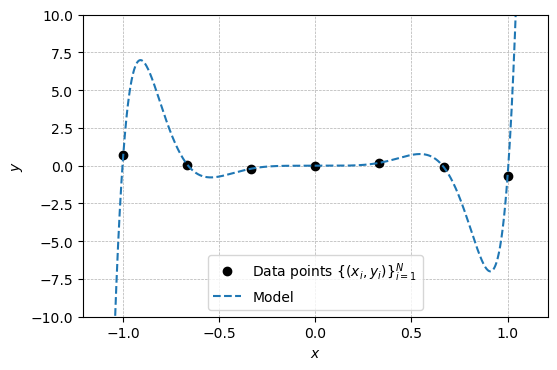

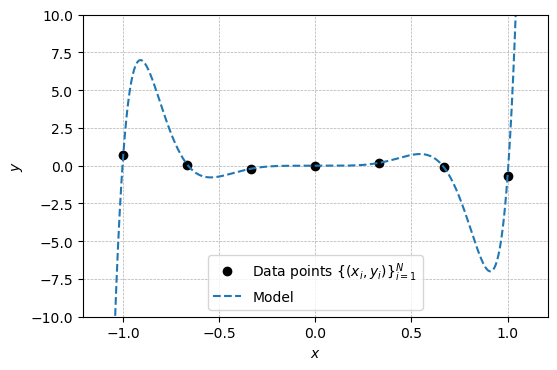

In [247]:
n = 9 # degree

# Calculating theta_star via the Euclidian projection formula
X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X
theta_star = a - H_inv@XT@np.linalg.inv(X@H_inv@XT)@(X@a-ys)

x = np.linspace(-1.1, 1.1, num = 1000)
fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')


axes.plot(x, np.polyval(np.flip(theta_star), x), '--')
    
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', 'Model'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-10, 10]);

---

__f)__ The scaled GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$ and $H\in\mathbb{S}_{+}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} H^{-1}\nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

For numerical reasons (i.e., so that the algorithm converges in reasonable time), consider the less skewed diagonal scaling matrix below:

In [33]:
H_inv = np.diag(np.logspace(-3, 0, num = n + 1)) # the inverse of H

Starting at $\theta_{0}=0$ and using the step size $\gamma_{k}=1/\beta_{H}$, show that the scaled GD method converges to the scaled projection point $\theta^{*}=a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$ for $a=0$.

Here, $\beta_{H}$ is given by

\begin{align}
    \beta_{H} = \frac{2}{N}\left\lVert H^{-\frac{1}{2}}X^{T}X H^{-\frac{1}{2}} \right\rVert_{2},
\end{align}

where $H^{-\frac{1}{2}}$ is the symmetric square root of $H^{-1}$.

__Solution:__ 

As seen in the graph below the norm of the difference between $\theta_k$ given by the scaled GD-method and $\theta^*$ given by the scaled projection converges to 0. In other words, the scaled GD-method converges to the scaled projection point.
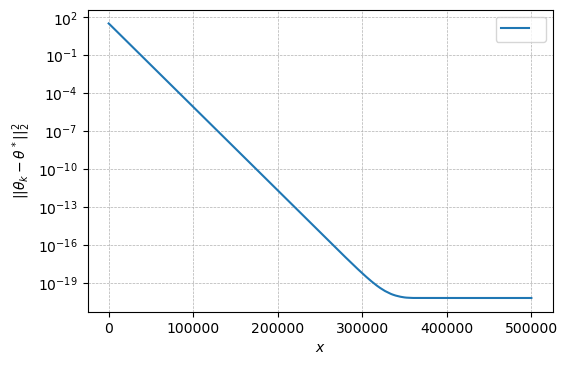

It converges! #Wohoo


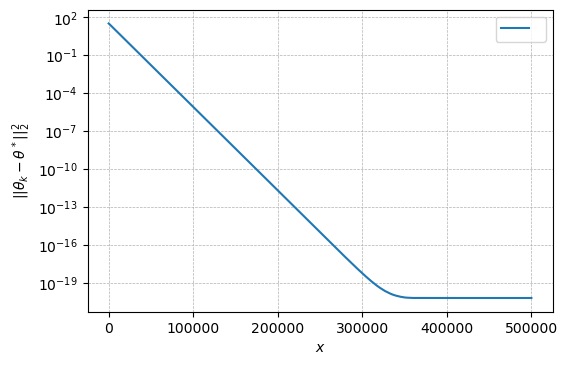

In [34]:
#Implementing gradient descent method
n = 9 #Sets the degree
N = len(xs)
theta = np.zeros(n+1).transpose() #Creates the initial theta
X = np.array([np.power(x, np.arange(n+1)) for x in xs]) #The X matrix
XT = X.transpose() #Transpose of X
XTX = XT@X
beta_h = 2/N*np.linalg.norm(np.sqrt(H_inv)@XTX@np.sqrt(H_inv), 2)#Smoothness parameter dependent on X
gamma_k = 1/beta_h #constant stepsize

a = np.zeros(n+1)
theta_star = a - H_inv@XT@np.linalg.inv(X@H_inv@XT)@(X@a-ys) #theta_star from scaled euclidian projection

theta_norms = []
theta_norm = 1
                     
for i in range (0,5*pow(10, 5)):
    theta = theta - gamma_k*H_inv@(2/N*(XTX@theta-XT@ys))
    theta_norm = np.square(np.linalg.norm(theta-theta_star))
    theta_norms.append(theta_norm)

fig, axes = plt.subplots(dpi=100)
axes.plot(theta_norms)
axes.legend([r''])
axes.set_yscale('log')
axes.set_xlabel('$x$')
axes.set_ylabel(r'$||\theta_k-\theta^*||_2^2$')
axes.grid(linestyle='dashed', linewidth=0.5)

#checking if it converges
if theta_norm <= pow(10,-16):
    print('It converges! #Wohoo')
else:
    print('It did not converge')

---
### Exercise 5: Implicit regularization via flatness
_Remark:_ You should solve this exercise using `numpy` primarily.

It has been observed in the [literature](https://arxiv.org/pdf/1609.04836.pdf) that flat mimima tend to lead to better generalization than sharp minima. In this exercise, we empirically verfiy that SGD tends to favour flat mimima.

Consider the finite-sum problem problem
$$
\begin{equation}
\begin{aligned}
& \underset{x\in\mathbb{R}}{\mathrm{minimize}}
& & f(x)= \frac{1}{N} \sum_{i=1}^{N}f_{i}(x)
\end{aligned}
\end{equation}
$$
where the $f_{i}$'s and $f$ are given below: (the derivatives are also given for convenience.)

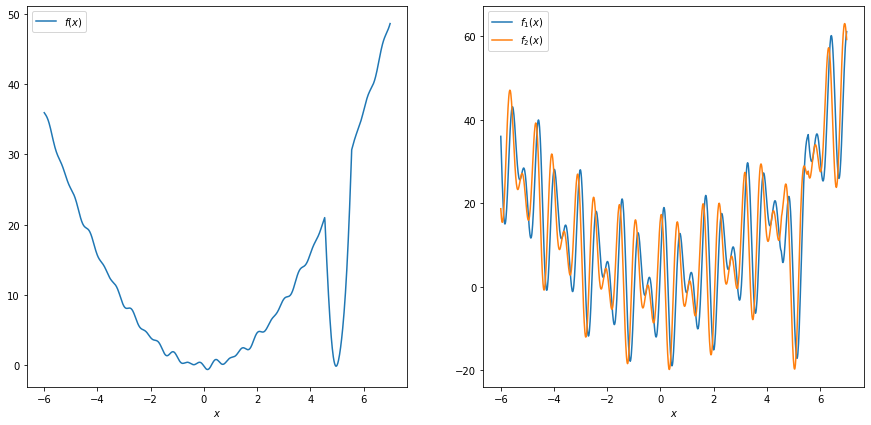

In [36]:
from functools import partial

def loss_term(phase, x):
    if x < 50/11:
        value = x**2
    elif x < 50/9:
        value = 100*(x - 5)**2
    else:
        value = x**2
    return value + 20*np.sin(10*x + phase)*np.cos(2*(x - 5))

def derivative_of_loss_term(phase, x):
    if x < 50/11:
        value = 2*x
    elif x < 50/9:
        value = 200*(x - 5)
    else:
        value = 2*x
    return value + 20*(10*np.cos(10*x + phase)*np.cos(2*(x - 5)) - 2*np.sin(10*x + phase)*np.sin(2*(x - 5)))

N = 2000 # the number of summands
np.random.seed(0)
phases = 2 * np.pi * np.random.rand(N)

# The induvidual summands f_i as a list
f_i_s = list(map(lambda phase : np.vectorize(partial(loss_term, phase)), phases))

# The function f
f = np.vectorize(lambda x : np.mean([f_i(x) for f_i in f_i_s]))

# Derivatives are provided for convenience
derivative_f_i_s = list(map(lambda phase : np.vectorize(partial(derivative_of_loss_term, phase)), phases))
derivative_f = np.vectorize(lambda x : np.mean([d_f_i(x) for d_f_i in derivative_f_i_s]))

x = np.linspace(-6, 7, num=1000)
y_1 = f_i_s[0](x)
y_2 = f_i_s[1](x)
y = f(x)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(x, y)
axes[0].legend(["$f(x)$"])
axes[0].set_xlabel('$x$')
axes[1].plot(x, y_1)
axes[1].plot(x, y_2)
axes[1].legend(["$f_{1}(x)$", "$f_{2}(x)$"])
axes[1].set_xlabel('$x$');

Note that the function $f$ has a flat minimum close to $0$ and a sharp minimum close to $5$. Implement both GD and SGD for this problem: 

- Start at $x_{0}=5$, i.e., close to the sharp minimum. 
- Let both GD and SGD go for $2000$ iterations.
- Use the same constant step size $\gamma_{k} = 0.001$ for SGD and GD. 
- You should notice that SDG manages to escape the sharp minimum and find the flat minimum (most of the time), while GD does not. Illustrate this by plotting $x_{k}$ as a function of $k$ for both methods.  (Common mistake: We are not asking for $f(x_k)$ vs $x_k$.)

Give some brief comments.

__Solution:__

As showed in the graph below GD converges to the sharp minima at $x \approx 5$ while SGD seems to escape the sharp minima and instead converge to the flatter minima at $x \approx 0$ as expected.

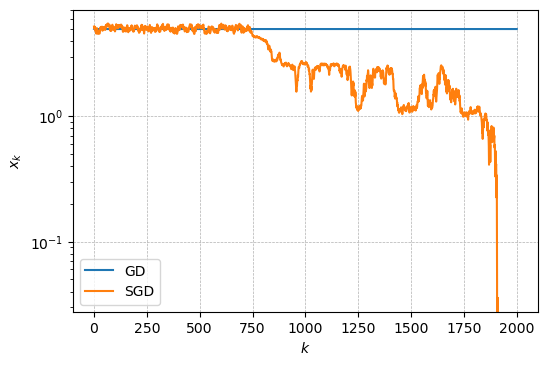

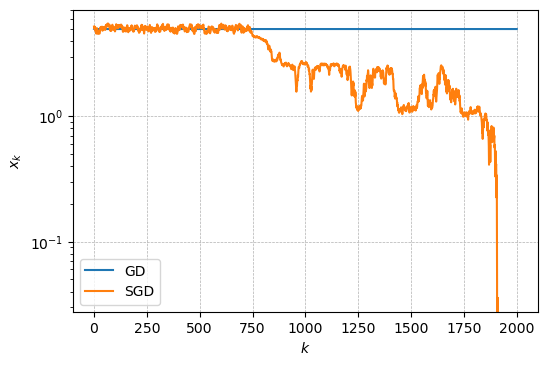

In [38]:
x_gd = 5 # initial point
x_sgd = 5 #Creates the initial theta for SGD

x_gd_vect = []
x_sgd_vect = []
gamma_k = 0.001 # constant step size

#print(derivative_f(x))
#print(derivative_f_i_s[1999](5))
#print(phases[1])

for k in range (0, 2000):
    x_gd = x_gd-gamma_k*derivative_f(x_gd)
    phase = 2 * np.pi * np.random.rand(0)
    stok = np.random.randint(0, high=1999)
    x_sgd = x_sgd-gamma_k*derivative_f_i_s[stok](x_sgd)
    x_gd_vect.append(x_gd)
    x_sgd_vect.append(x_sgd)
    
fig, axes = plt.subplots(dpi=100)
axes.plot(x_gd_vect)
axes.plot(x_sgd_vect)
axes.legend(['GD', 'SGD'])
axes.set_yscale('log')
axes.set_xlabel('$k$')
axes.set_ylabel('$x_k$')
axes.grid(linestyle='dashed', linewidth=0.5)